# Uczenie Maszynowe

Uczenie maszynowe to dział sztucznej inteligencji, który do rozwiązywania zadań wykorzystuje dane. Obrazek poniżej przedstawia podstawowe gałęzie uczenia maszynowego. W dzisiejszych przykładach skupimy się na uczeniu nadzorowanym (_supervised learning_), ale podobne techniki stosuje się też w pozostałych obszarach uczenia maszynowego.

![](https://www.datocms-assets.com/14946/1590593600-machine-learning-610x413.png)

Na potrzeby tej prezentacji przez $f_\mathbf{\theta}: X \to Y$ oznaczmy **model** uczenia maszynowego. Jest to dowolnie zdefiniowana funkcja, która przyjmuje dane wejściowe $\mathbf{x} \in X$ i zwraca predykcję $y \in Y$ dla podanych danych. Dodatkowo, we wzorze funkcji pojawiają się **parametry** modelu $\mathbf{\theta}$, które będą "uczone" -- wzór funkcji (algorytm) pozostaje stały, a zmieniają się jedynie te wartości.

<div style="text-align: center;">
<img style="display:inline" src="autonomous.gif" width="30%"/>
<img style="display:inline"  src="style.gif" width="30%"/>
<img style="display:inline"  src="molecules.gif" width="30%"/>
</div>

# Regresja Liniowa

W zadaniu regresji dane są postaci $\mathcal{D} = \{(\mathbf{x}, y):\,\mathbf{x}\in\mathbb{R}^d, \, y\in\mathbb{R}\}$, gdzie $d$ jest liczbą zmiennych wejściowych. Regresją jest więc na przykład:

- przewidywanie ceny mieszkania w zależności od $d$ zmiennych, np. wielkości mieszkania, odległości od centrum, ...,
- przewidywanie skrętu kierownicą w przypadku autonomicznych samochodów, bazując na odczytach z $d$ różnych czujników,
- przewidywanie rozpuszczalności związku chemicznego na podstawie innych jego własności chemicznych (najlepiej łatwo wyliczalnych na komputerze).

W przypadku **regresji liniowej**, naszym modelem jest równanie prostej (płaszczyzny, hiperpłaszczyzny). Dla prostoty obliczeń ograniczmy się do najwyżej 2 zmiennych. W przypadku większej liczby zmiennych wygodniejsze są obliczenia na wektorach i macierzach, o czym nie było mowy na zajęciach, ale wyprowadzenia są bardzo analogiczne. Użycie tylko 2 zmiennych pozwoli też na wizualizację wyników.

Model regresji liniowej:

\begin{equation}
f_\mathbf{\theta}(x) = \underbrace{\theta_0}_{\text{bias}} + \theta_1 x
\end{equation}

W ogólniejszym przypadku:


\begin{equation}
f_\mathbf{\theta}(x_1, x_2, \dots, x_n) = \underbrace{\theta_0}_{\text{bias}} + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
\end{equation}

### Generowanie Danych

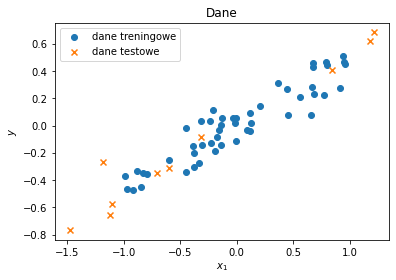

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def f(x, theta):
    x = np.insert(x, 0, 1., axis=-1)
    if x.ndim == 2:
        return np.matmul(x, np.expand_dims(theta, -1)).squeeze(-1)
    else:
        return np.dot(x, theta)

train_size = 50
test_size = 10
theta = np.array([0., 0.5])

X_train = np.random.uniform(-1, 1, size=(train_size, len(theta) - 1))
y_train = f(X_train, theta)
y_train += np.random.normal(scale=0.1, size=(train_size))

X_test = np.random.uniform(-1.5, 1.5, size=(test_size, len(theta) - 1))
y_test = f(X_test, theta)
y_test += np.random.normal(scale=0.1, size=(test_size))

plt.title('Dane')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.scatter(X_train, y_train, label='dane treningowe')
plt.scatter(X_test, y_test, marker='x', label='dane testowe')
plt.legend()
plt.show()

### Prawdziwy proces "generujący" dane

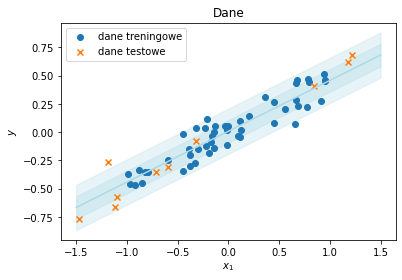

In [23]:
plt.title('Dane')
plt.xlabel('$x_1$')
plt.ylabel('$y$')

plt.plot([-1.5, 1.5], [theta[0] + theta[1] * (-1.5), theta[0] + theta[1] * (1.5)], c='lightblue')
plt.fill_between(
    [-1.5, 1.5], 
    [theta[0] + theta[1] * (-1.5) - 0.2, theta[0] + theta[1] * (1.5) - 0.2], 
    [theta[0] + theta[1] * (-1.5) + 0.2, theta[0] + theta[1] * (1.5) + 0.2],
    alpha=0.3, color='lightblue'
)
plt.fill_between(
    [-1.5, 1.5], 
    [theta[0] + theta[1] * (-1.5) - 0.1, theta[0] + theta[1] * (1.5) - 0.1], 
    [theta[0] + theta[1] * (-1.5) + 0.1, theta[0] + theta[1] * (1.5) + 0.1],
    alpha=0.3, color='lightblue'
)

plt.scatter(X_train, y_train, label='dane treningowe')
plt.scatter(X_test, y_test, marker='x', label='dane testowe')
plt.legend()
plt.show()

### Funkcja kosztu

Żeby dopasować wykres modelu do danych treningowych (niebieskich punktów), musimy ustalić cel, który będziemy optymalizować. W uczeniu maszynowym ten cel będziemy nazywać **funkcją kosztu**. W przypadku regresji, najbardziej naturalnym wyborem jest minimalizacja odległości punktów od wykresu funkcji $f_\mathbf{\theta}$. Definiujemy błąd średniokwadratowy:

\begin{equation}
\mathcal{L}(\mathcal{D}, \mathbf{\theta}) =
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \underbrace{\epsilon_i}_{\text{błąd}}^2 =
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(\underbrace{\hat{y}^{(i)}}_{\text{przewidywanie}} - \underbrace{y^{(i)}}_{\text{prawdziwa wartość}}\right)^2 =
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(f_\theta\left(x^{(i)}\right) - y^{(i)}\right)^2 = \frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(\theta_0+\theta_1 x^{(i)} - y^{(i)}\right)^2
\end{equation}

Nasze zadanie to zatem znalezienie parametrów $\mathbf{\theta}$, które minimalizują błąd:

\begin{equation}
{\arg\min}_\mathbf{\theta} \,\, \mathcal{L}(\mathcal{D}, \mathbf{\theta})
\end{equation}

In [75]:
from ipywidgets import interact

def loss_function(theta0, theta1, X=X_train, y=y_train):
    y_pred = f(X, np.array([theta0, theta1]))
    loss = np.mean(np.power(y_pred - y, 2))
    return loss

    
x1, x2 = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
loss = np.vectorize(loss_function)(x1, x2)

x_linspace = np.expand_dims(np.linspace(-1.5, 1.5, 10), -1)

@interact(theta0=(-2., 2., 0.1), theta1=(-2., 2., 0.1))
def plot_errors(theta0, theta1):
    theta = np.array([theta0, theta1])
    y_pred = f(x_linspace, theta)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    ax[0].set_title("Wizualizacja modelu i jego błędu")
    ax[0].scatter(X_train, y_train)
    ax[0].vlines(X_train, y_train, f(X_train, theta), ls='--', 
               linewidth=1.2, alpha=0.6)
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$y$')
    ax[0].axis('equal')
    ax[0].set_xlim(-2, 2)
    ax[0].plot(x_linspace, y_pred, color='orange', alpha=0.8)
    
    ax[1].set_title("Funkcja kosztu")
    ax[1].contour(x1, x2, loss)
    ax[1].scatter([theta0], [theta1], marker='*', s=200, c='orange')
    ax[1].set_xlabel('$\\theta_0$')
    ax[1].annotate(f'$\mathcal{{L}}={loss_function(theta0, theta1):.2f}$', [theta0 + 0.1, theta1 + 0.1], size=12)
    
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='theta0', max=2.0, min=-2.0), FloatSlider(value=0.0, …

### Optymalne rozwiązanie (1 zmienna)

Załóżmy dla uproszczenia na razie, że $\theta_0=0$ oraz $\theta := \theta_1$, więc $f(x)=\theta x$.

Dla optymalnego rozwiązania, funkcja kosztu $\mathcal{L}$ będzie miała najniższą wartość. Szukamy więc minimum funkcji zmiennej $\theta$. Rozpisujemy:

\begin{gather}
\mathcal{L} = 
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(\theta x^{(i)} - y^{(i)}\right)^2 =
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \theta^2 (x^{(i)})^2 + (y^{(i)})^2 - 2y^{(i)} x^{(i)} \theta
\end{gather}

Liczymy pochodną względem $\theta$ (tylko ją możemy modyfikować):

\begin{gather}
\mathcal{L}' = 
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} 2\theta(x^{(i)})^2 - 2y^{(i)} x^{(i)} = \\ 
= \frac{2}{|\mathcal{D}|}\left(\theta\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 - \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)}\right)
\end{gather}

Przyrównując równanie do zera, otrzymujemy:

\begin{gather}
\theta\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 - \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)} = 0 \\
\theta = \frac{\sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)}}{\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2}
\end{gather}

### Optymalne rozwiązanie (2 zmienne)

Dla optymalnego rozwiązania, funkcja kosztu $\mathcal{L}$ będzie miała najniższą wartość. Szukamy więc minimum funkcji 2 zmiennych: $\theta_0$ oraz $\theta_1$. Rozpisujemy:

\begin{gather}
\mathcal{L} = 
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(\theta_0+\theta_1 x^{(i)} - y^{(i)}\right)^2 =
\frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \theta^2_0+\theta^2_1 (x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0\theta_1x^{(i)} - 2y^{(i)}\theta_0 - 2y^{(i)} x^{(i)} \theta_1
\end{gather}

Liczymy pochodne cząstkowe po parametrach $\theta$ (tylko je możemy modyfikować):

\begin{gather}
\frac{\partial \mathcal{L}}{\partial \theta_0} = \frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} 2\theta_0 + 2\theta_1x^{(i)} - 2y^{(i)} = \\
= \frac{2}{|\mathcal{D}|}\left(|\mathcal{D}|\theta_0 + \theta_1 \sum_{i=1}^{|\mathcal{D}|} x^{(i)} - \sum_{i=1}^{|\mathcal{D}|}y^{(i)}\right)\\
\frac{\partial \mathcal{L}}{\partial \theta_1} = \frac{1}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} 2\theta_1(x^{(i)})^2 + 2\theta_0x^{(i)} - 2y^{(i)} x^{(i)} = \\ 
= \frac{2}{|\mathcal{D}|}\left(\theta_1\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 + \theta_0\sum_{i=1}^{|\mathcal{D}|} x^{(i)} - \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)}\right)
\end{gather}

Przyrównując pierwsze równanie do zera, otrzymujemy:

\begin{gather}
|\mathcal{D}|\theta_0 + \theta_1 \sum_{i=1}^{|\mathcal{D}|} x^{(i)} - \sum_{i=1}^{|\mathcal{D}|}y^{(i)} = 0, \\
\theta_0 = \frac{\sum_{i=1}^{|\mathcal{D}|}y^{(i)} - \theta_1 \sum_{i=1}^{|\mathcal{D}|} x^{(i)}}{|\mathcal{D}|} = \bar{y}-\theta_1\bar{x},
\end{gather}
gdzie $\bar{y}$ to średnia wartość etykiety, a $\bar{x}$ to średnia wartość zmiennej $x$ w zbiorze $\mathcal{D}$. Z drugiego równania po podstawieniu $\theta_0$ mamy:

\begin{gather}
\theta_1\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 + (\bar{y}-\theta_1\bar{x})\bar{x} - \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)} = 0 \\
\theta_1\left(\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 - \bar{x}^2\right) = \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)} - \bar{y}\bar{x}  \\ 
\theta_1 = \frac{\sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)}- \bar{y}\bar{x}}{\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 - \bar{x}^2}
\end{gather}

Bias: 0.007680, Theta_1: 0.449227


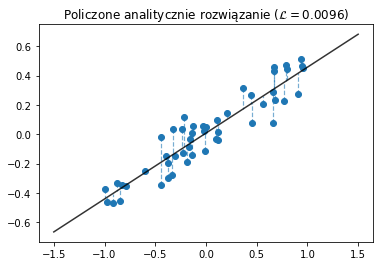

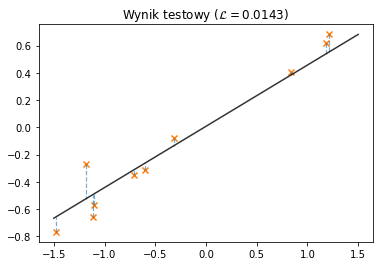

In [78]:
def train_f(x, y):
    x = x.flatten()
    x_mean = x.mean()
    y_mean = y.mean()
    theta_1 = (np.sum(x * y) - x_mean * y_mean) / (np.sum(x * x) - x_mean * x_mean)
    theta_0 = y_mean - theta_1 * x_mean
    return [theta_0, theta_1]

theta = train_f(X_train, y_train)
x_linspace = np.expand_dims(np.linspace(-1.5, 1.5, 10), -1)
y_pred = f(x_linspace, theta)
print(f'Bias: {theta[0]:.6f}, Theta_1: {theta[1]:.6f}')

plt.title(f"Policzone analitycznie rozwiązanie ($\\mathcal{{L}}={loss_function(theta[0], theta[1]):.4f}$)")
plt.scatter(X_train, y_train)
plt.vlines(X_train, y_train, f(X_train, theta), ls='--', 
           linewidth=1.2, alpha=0.6)
plt.plot(x_linspace, y_pred, color='k', alpha=0.8)
plt.show()

plt.title(f"Wynik testowy ($\\mathcal{{L}}={loss_function(theta[0], theta[1], X=X_test, y=y_test):.4f}$)")
plt.scatter(X_test, y_test, alpha=0.)
plt.scatter(X_test, y_test, marker='x')
plt.vlines(X_test, y_test, f(X_test, theta), ls='--', 
           linewidth=1.2, alpha=0.6)
plt.plot(x_linspace, y_pred, color='k', alpha=0.8)
plt.show()

Bias: 0.007682, Theta_1: 0.449019


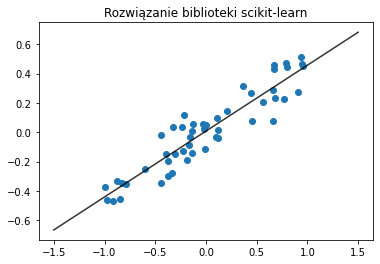

In [79]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
x_linspace = np.expand_dims(np.linspace(-1.5, 1.5, 10), -1)
y_pred = reg.predict(x_linspace)
print(f'Bias: {reg.intercept_:.6f}, Theta_1: {reg.coef_[0]:.6f}')

plt.title("Rozwiązanie biblioteki scikit-learn")
plt.scatter(X_train, y_train)
plt.plot(x_linspace, y_pred, color='k', alpha=0.8)
plt.show()

### Dowód jedynego optymalnego rozwiązania (1 zmienna)

Żeby udowodnić, że rozwiązanie optymalne jest jedyne i dane wzorem wyprowadzonym powyżej, możemy pokazać, że funkcja kosztu jest wypukła. W tym celu liczymy drugą pochodną funkcji kosztu po parametrze $\theta$:

\begin{equation}
\mathcal{L}'' = \left(\frac{2}{|\mathcal{D}|}\left(\theta\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 - \sum_{i=1}^{|\mathcal{D}|} x^{(i)}y^{(i)}\right)\right)' =
\frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|}(x^{(i)})^2 \geq 0
\end{equation}

Funkcja ta jest więc ściśle wypukła wszędzie, gdzie jesteśmy w stanie policzyć $\theta$ (wyjątkiem są dane, gdzie wszystkie obiekty mają cechę $x$ równą 0).

### Dowód jedynego optymalnego rozwiązania (2 zmienne)

Rozwiązywalność problemu regresji liniowej jawnym wzorem zawdzięczamy wypukłości funkcji kosztu. Funkcja ta ma wtedy zawsze dokładnie jedno minimum. Pokażemy, że średniokwadratowy błąd jako funkcja kosztu jest wypukła. Macierz Hessego wygląda następująco:

\begin{gather}
H = 
    \begin{bmatrix}
    \frac{\partial^2\mathcal{L}}{\partial \theta_0^2} & \frac{\partial^2\mathcal{L}}{\partial \theta_0\,\partial \theta_1} \\
    \frac{\partial^2\mathcal{L}}{\partial \theta_1\,\partial \theta_0} & \frac{\partial^2\mathcal{L}}{\partial \theta_1^2}
    \end{bmatrix} =
    \begin{bmatrix}
    \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} 1 & \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} x^{(i)} \\
    \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} x^{(i)} & \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(x^{(i)}\right)^2
    \end{bmatrix}
\end{gather}

Widzimy, że główne minory wiodące tej macierzy są nieujemne, a macierz jest symetryczna:

\begin{gather}
\frac{2}{|\mathcal{D}|} \sum_{i=1}^{|\mathcal{D}|} 1 > 0, \\
|H| = \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} 1 \cdot \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} \left(x^{(i)}\right)^2 - \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} x^{(i)} \cdot \frac{2}{|\mathcal{D}|}\sum_{i=1}^{|\mathcal{D}|} x^{(i)} = \\
= \frac{4}{|\mathcal{D}|^2}\left(|\mathcal{D}|\sum_{i=1}^{|\mathcal{D}|} \left(x^{(i)}\right)^2 - \left(\sum_{i=1}^{|\mathcal{D}|} x^{(i)}\right)^2\right) = \\ 
= \frac{4}{|\mathcal{D}|^2} \left(\sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} \left(x^{(i)}\right)^2 - \sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} x^{(i)}x^{(j)}\right) = \\
= \frac{2}{|\mathcal{D}|^2} \cdot 2 \sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} \left( \left(x^{(i)}\right)^2 - x^{(i)}x^{(j)}\right) = \\
= \frac{2}{|\mathcal{D}|^2} \cdot \left( \sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} \left( \left(x^{(i)}\right)^2 - x^{(i)}x^{(j)}\right) + \sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} \left( \left(x^{(j)}\right)^2 - x^{(j)}x^{(i)}\right) \right) = \\
= \frac{2}{|\mathcal{D}|^2} \sum_{i=1}^{|\mathcal{D}|}\sum_{j=1}^{|\mathcal{D}|} \left(x^{(i)} - x^{(j)}\right)^2 \geq 0
\end{gather}

 Będzie ona więc dodatnio półokreślona, a zatem funkcja jest wypukła.

In [81]:
from matplotlib import cm
from ipywidgets import interact

def loss(x, y, theta):
    y_pred = f(x, theta)
    return np.mean((y_pred - y) ** 2)

loss(X_train, y_train, theta)

x = np.arange(-2., 2., 0.1)
y = np.arange(-2., 2., 0.1)
z = np.array([[loss(X_train, y_train, np.array([i, j])) for i in x] for j in y])

x, y = np.meshgrid(x, y)
x_linspace = np.expand_dims(np.linspace(-1, 1, 10), -1)

@interact(theta_0=(-2., 2., 0.1), theta_1=(-2., 2., 0.1))
def plot(theta_0=0., theta_1=0.5):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("Funkcja kosztu")
    ax.set_xlabel('$\\theta_0$')
    ax.set_ylabel('$\\theta_1$')
    ax.view_init(60, 50)
    ax.plot_surface(x, y, z, cmap='binary', alpha=0.9)
    ax.scatter(theta_0, theta_1, loss(X_train, y_train, np.array([theta_0, theta_1])),
               color='black', marker='x', s=50)

    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(X_train, y_train)

    y_pred = f(x_linspace, np.array([theta_0, theta_1]))
    ax.set_title('Predykcja')
    ax.set_xlabel('$x$')
    ax.axis('equal')
    ax.plot(x_linspace, y_pred, color='k')

    plt.show()

interactive(children=(FloatSlider(value=0.0, description='theta_0', max=2.0, min=-2.0), FloatSlider(value=0.5,…

## Modelowanie funkcji nieliniowych

Często prawdziwa funkcja danych (nieznana, modelująca przestrzeń $Y$) nie jest liniowa, więc użycie regresji liniowej w powyższej postaci nie jest wystarczające. Okazuje się, że najprostszym rozwiązaniem jest użycie funkcji wielomianowych do modelowania zależności etykiety od danych. Prosta modyfikacja pozwala przenieść problem regresji wielomianowej do regresji liniowej.

Zdefiniujmy sobie funkcję bazową $\phi_\varrho: X \to X'$ tak, że zamiast pojedynczej zmiennej $x\in X$ mamy kilka kolejnych potęg tej zmiennej do stopnia $\varrho$, tj. $x \mapsto [1, x, x^2, x^3, \dots, x^\varrho]$. Wtedy możemy zamodelować dane przy pomocji zwykłej regresji liniowej na rozszerzonym zbiorze zmiennych $f_\theta: X' \to Y$.

Zauważmy, że w ten sposób cała matematyka wyprowadzona powyżej pozostaje aktualna, tzn. istnieje dokładnie jeden wielomian stopnia $\varrho$, który optymalnie opisuje dane, bo funkcja kosztu jest wypukła.

Zwracam tutaj też uwagę na analogię do **szeregu Taylora** -- każda funkcja gładka może zostać przedstawiona w postaci szeregu potęgowego (wielomianu) i jest on jednoznaczny. Możemy mieć więc nadzieję, że przy dużej liczbie danych ($|\mathcal{D}| \to \infty$) i uwzględnieniu wszystkich zmiennych będziemy mogli znaleźć idealną zależność etykiety od danych.

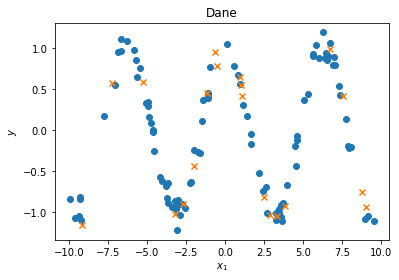

In [105]:
train_size = 100
test_size = 20
theta = np.array([0., 0.5, 2.])

def g(x):
    return np.cos(x)

horizon = 10

X_train = np.random.uniform(-horizon, horizon, size=train_size)
y_train = g(X_train)
y_train += np.random.normal(scale=0.1, size=(train_size))

X_test = np.random.uniform(-horizon, horizon, size=test_size)
y_test = g(X_test)
y_test += np.random.normal(scale=0.1, size=(test_size))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Dane')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y$')
ax.scatter(X_train, y_train)
ax.scatter(X_test, y_test, marker='x')
plt.show()

In [134]:
from sklearn.preprocessing import PolynomialFeatures
import math

def cos_taylor(x, n):
    p = np.asarray([
        np.ones_like(x),
        np.zeros_like(x),
        -x ** 2 / math.factorial(2),
        np.zeros_like(x),
        x ** 4 / math.factorial(4),
        np.zeros_like(x),
        -x ** 6 / math.factorial(6),
        np.zeros_like(x),
        x ** 8 / math.factorial(8),
        np.zeros_like(x),
        -x ** 10 / math.factorial(10),
        np.zeros_like(x),
        x ** 12 / math.factorial(12),
        np.zeros_like(x),
        -x ** 14 / math.factorial(14),
        np.zeros_like(x),
        x ** 16 / math.factorial(16),
        np.zeros_like(x),
        -x ** 20 / math.factorial(20),
    ][:n])
    return np.sum(p, axis=0)

@interact(polynomial_degree=(1, 21, 1))
def plot_mlr(polynomial_degree=1, show_train=True, show_test=True, show_true_model=True, show_taylor=False):
    reg = LinearRegression()
    poly = PolynomialFeatures(polynomial_degree)

    X_trans = poly.fit_transform(X_train.reshape(-1, 1))
    reg.fit(X_trans, y_train)
    y_pred = reg.predict(X_trans)

    x = np.arange(-horizon, horizon, 0.2)
    y = reg.predict(poly.transform(np.c_[np.ravel(x)])).reshape(x.shape)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)

    ax.set_title('Przybliżenie wielomianem')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.plot(x, y, alpha=0.5, label='predykcja')
    if show_true_model:
        y_true = g(np.ravel(x)).reshape(x.shape)
        ax.plot(x, y_true, alpha=0.5, label='prawdziwa funkcja')
    if show_taylor:
        y_taylor = cos_taylor(np.ravel(x), n=polynomial_degree).reshape(x.shape)
        ax.plot(x, y_taylor, alpha=0.5, label='Taylor')

    ax.set_ylim(-2, 2)

    if show_train:
        ax.scatter(X_train, y_train)
    if show_test:
        ax.scatter(X_test, y_test, marker='x')

    plt.show()
    
    print( f'{reg.intercept_:.2f}' + ' + '.join([f'({coef:.2f})x^{i}' for i, coef in enumerate(reg.coef_)]))

interactive(children=(IntSlider(value=1, description='polynomial_degree', max=21, min=1), Checkbox(value=True,…

\begin{equation}
\cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} = 1 - 0.5 x^2 + 0.041(6) x^4 - 0.0013(8) x^6
\end{equation}

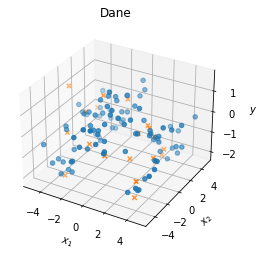

In [82]:
train_size = 100
test_size = 20
theta = np.array([0., 0.5, 2.])

def g(x, y):
    return np.cos(x) + np.cos(y)

horizon = 5

X_train = np.random.uniform(-horizon, horizon, size=(train_size, len(theta) - 1))
y_train = g(X_train[:, 0], X_train[:, 1])
y_train += np.random.normal(scale=0.1, size=(train_size))

X_test = np.random.uniform(-horizon, horizon, size=(test_size, len(theta) - 1))
y_test = g(X_test[:, 0], X_test[:, 1])
y_test += np.random.normal(scale=0.1, size=(test_size))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Dane')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, marker='x')
plt.show()

In [87]:
from sklearn.preprocessing import PolynomialFeatures

@interact(polynomial_degree=(1, 11, 1))
def plot_mlr(polynomial_degree=6, show_train=False, show_test=False):
    reg = LinearRegression()
    poly = PolynomialFeatures(polynomial_degree)

    X_trans = poly.fit_transform(X_train)
    reg.fit(X_trans, y_train)
    y_pred = reg.predict(X_trans)

    x = np.arange(-horizon, horizon, 0.2)
    y = np.arange(-horizon, horizon, 0.2)
    x, y = np.meshgrid(x, y)
    z = reg.predict(poly.transform(np.c_[np.ravel(x), np.ravel(y)])).reshape(x.shape)
    z_true = g(np.ravel(x), np.ravel(y)).reshape(x.shape)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_title('Przybliżenie wielomianem')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.plot_surface(x, y, z, alpha=0.5, label='predykcja')
    ax.plot_surface(x, y, z_true, alpha=0.5, label='prawdziwa funkcja')

    if show_train:
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if show_test:
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, marker='x')

    plt.show()

interactive(children=(IntSlider(value=6, description='polynomial_degree', max=11, min=1), Checkbox(value=False…

# Sieci Neuronowe

![neural net](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

Sieci neuronowe są nieco bardziej złożonym modelem. Żeby umożliwić modelowanie nieliniowych zależności, wprowadzone zostają warstwy ukryte, w których obliczane są pośrednie wartości modelu. Liczba warstw (głębokość sieci) i liczba neuronów (szerokość sieci) są wartościami ustalanymi z góry (hiperparametry). Każdy neuron w warstwie ukrytej można postrzegać jako regresję liniową, gdzie zmiennymi są wszystkie wartości neuronów z poprzedniej warstwy, czyli:

\begin{equation}
  a_i^{(l)} = \sigma\left(\theta_{i,0} + \theta_{i,1} a_1^{(l-1)} + \cdots + \theta_{i,w} a_w^{(l-1)}\right)
\end{equation}

Dodatkowa funkcja $\sigma$ zwana **funkcją aktywacji** jest nieliniowym przekształceniem, wprowadzającym nieliniowość do wzoru. Typową taką funkcją jest sigmoid:

\begin{equation}
\sigma(u) = \frac{1}{1+e^{-u}}
\end{equation}

![sigmoid](https://miro.medium.com/max/1033/0*D5do3xhv5ulF50w2.png)

### Uczenie sieci neuronowej

Zauważmy, że model taki ma znacznie więcej parametrów trenowalnych (zwanych w sieciach **wagami**) niż prosta regresja liniowa. Okazuje się też, że ta sama funkcja kosztu zaaplikowana do sieci neuronowych nie jest funkcją wypukłą względem parametrów sieci. Optymalizacja (trening) takiego modelu wymaga więc nieco innego podejścia, ponieważ w zależności od architektury sieci znalezienie rozwiązania analitycznym sposobem może stanowić spore wyzwanie.

Dla ułatwienia obliczeń rozważmy sieć z 2 zmiennymi na wejściu i 2 neuronami w warstwie ukrytej. Wzór takiej sieci można zapisać następująco:

\begin{gather}
f_\theta = \theta_{1,0}^{(2)} + \theta_{1,1}^{(2)} a_1 + \theta_{1,2}^{(2)} a_2 \\ 
a_1 = \sigma(h_1), \quad h_1 = \theta_{1,0}^{(1)} + \theta_{1,1}^{(1)}x_1 + \theta_{1,2}^{(1)}x_2 \\
a_2 = \sigma(h_2), \quad h_2 = \theta_{2,0}^{(1)} + \theta_{2,1}^{(1)}x_1 + \theta_{2,2}^{(1)}x_2 \\
\end{gather}

Żeby znaleźć optymalny zbiór parametrów, liczymy pochodne po parametrach $\theta$. W ogólności architektury sieci mogą być różne, ale zawsze pochodne można relatywnie łatwo obliczyć używając reguły łańcuchowej. Żeby obliczyć pochodną po określonej wadze, rozważamy wszystkie ścieżki w sieci neuronowej od wyjścia do danej wagi i rozpisujemy pochodną. Na przykład dla wagi $\theta_{1,2}^{(1)}$ w przykładzie wyżej:

\begin{gather}
\frac{\partial \mathcal{L}}{\theta_{1,2}^{(1)}} = \frac{\partial \mathcal{L}}{f_\theta} \cdot \frac{f_\theta}{a_1} \cdot \frac{a_1}{h_1} \cdot \frac{h_1}{\theta_{1,2}^{(1)}} \\
\frac{\partial \mathcal{L}}{f_\theta} = (f_\theta - y)^2 = 2(f_\theta - y), \\
\frac{\partial f_\theta}{\partial a_1} = \theta_{1,1}^{(2)}, \quad
\frac{\partial a_1}{\partial h_1} = \sigma'(h_1) = \frac{e^{-h_1}}{\left(1+e^{-h_1}\right)^2}, \quad
\frac{\partial h_1}{\partial \theta_{1,2}^{(1)}} = x_2.
\end{gather}

Zauważmy, że wszystkie wartości potrzebne do obliczenia tej pochodnej otrzymujemy w krokach pośrednich obliczania wyjścia modelu $f_\theta$. Możemy zatem policzyć pochodne po wszystkich parametrach (gradient) w 2 krokach:

1. **Przejście w przód** -- obliczenie wartości funkcji, zapisując jednoczenie wartości poszczególnych neuronów,
2. **Przejście w tył** -- obliczenie gradientu parametrów sieci, używając reguły łańcuchowej od wyjścia sieci do poszczególnych parametrów.

Pozostaje pytanie, jak znaleźć **minimum funkcji kosztu** względem parametrów? Przy obecnych architekturach sieci zadanie to nie jest wykonalne w efektywny sposób nawet dla komputerów, dlatego stosuje się przybliżenia. Zamiast wyliczać minimum analitycznie, szuka się go iteracyjnie.

Gdy przypomnimy sobie interpretację **gradientu** funkcji, to zauważymy, że wskazuje on kierunek, w którym funkcja rośnie najszybciej. Możemy więc poruszać się w kierunku przeciwnym do gradientu i małymi krokami zbliżać się do pobliskiego minimum lokalnego. Należy zaznaczyć, że w takim podejściu wynik zależy od losowej inicjalizacji parametrów oraz wielkości kroku.

![](https://miro.medium.com/max/1432/1*47skUygd3tWf3yB9A10QHg.gif)

In [137]:
def g(x, y):
    return np.cos(x) + np.cos(y)

horizon = 5

X_train = np.random.uniform(-horizon, horizon, size=(train_size, len(theta) - 1))
y_train = g(X_train[:, 0], X_train[:, 1])
y_train += np.random.normal(scale=0.1, size=(train_size))

X_test = np.random.uniform(-horizon, horizon, size=(test_size, len(theta) - 1))
y_test = g(X_test[:, 0], X_test[:, 1])
y_test += np.random.normal(scale=0.1, size=(test_size))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:53<00:00, 931.32it/s]


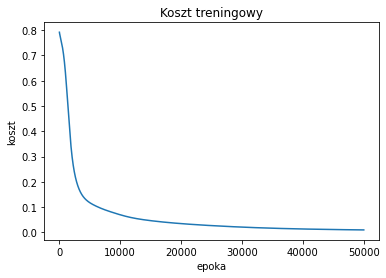

In [138]:
import torch
from tqdm import trange

n_epochs = 50000

X_tensor = torch.Tensor(X_train)
y_tensor = torch.Tensor(y_train).reshape(-1, 1)

hidden_size = 100
f = torch.nn.Sequential(torch.nn.Linear(2, hidden_size), torch.nn.Sigmoid(), torch.nn.Linear(hidden_size, 1))

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(f.parameters(), lr=0.02)

loss_curve = []
for epoch in trange(1, n_epochs + 1):
    optimizer.zero_grad()
    y_pred = f(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    loss_curve.append(loss.item())
    optimizer.step()

plt.plot(np.arange(1, n_epochs + 1), loss_curve)
plt.title('Koszt treningowy')
plt.xlabel('epoka')
plt.ylabel('koszt')
plt.show()

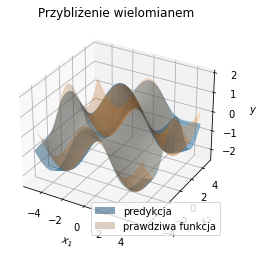

In [139]:
x = np.arange(-horizon, horizon, 0.2)
y = np.arange(-horizon, horizon, 0.2)
x, y = np.meshgrid(x, y)


z = f(torch.Tensor(np.c_[np.ravel(x), np.ravel(y)])).detach().numpy().reshape(x.shape)

z_true = g(np.ravel(x), np.ravel(y)).reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Przybliżenie wielomianem')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
surf = ax.plot_surface(x, y, z, alpha=0.5, label='predykcja')
surf._facecolors2d = surf._facecolors3d
surf._edgecolors2d = surf._edgecolors3d
surf = ax.plot_surface(x, y, z_true, alpha=0.25, label='prawdziwa funkcja')
surf._facecolors2d = surf._facecolors3d
surf._edgecolors2d = surf._edgecolors3d
plt.legend(loc='lower right')
plt.show()

# Analiza na wektorach i macierzach

Dla przypadku ogólnego regresji liniowej, wyprowadzenia łatwiej wykonać na wektorach i macierzach. Niech $\mathbf{x} = [x_1, x_2, \dots, x_d]$ oraz $\theta = [\theta_1, \theta_2, \dots, \theta_d]$. Wtedy model można zapisać następująco:

\begin{equation}
    f_{\theta}(\mathbf{x}) = \mathbf{x}^T\mathbf{\theta}
\end{equation}

Gdy przyjmiemy, że $\mathbf{X} \in \mathbb{R}^{N\times d}$ jest macierzą zawierającą kolejne przykłady ze zbioru treningowego w kolejnych wierszach, a $\mathbf{y}=[y^{(1)}, y^{(2)},\dots, y^{(N)}]$ to funkcję kosztu zapisujemy:

\begin{equation}
    \mathcal{L}(\mathbf{X}, \mathbf{y}) = \frac{1}{N}\Vert \mathbf{X}\mathbf{\theta} - \mathbf{y} \Vert_2^2,
\end{equation}

Następnie gradient po wektorze $\theta$ jest obliczany następująco:

\begin{gather}
    \frac{\partial \mathcal{L}}{\partial \mathbf{\theta}}(\mathbf{X}, \mathbf{y}) = -\frac{2}{N}\mathbf{y}^T\mathbf{X} + \frac{2}{N}(\mathbf{X}\mathbf{\theta})^T\mathbf{X} = \frac{2}{N}(\mathbf{\theta}^T\mathbf{X}^T\mathbf{X} - \mathbf{y}^T\mathbf{X})=0,\\
    \mathbf{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = \mathbf{X}^+\mathbf{y}.
\end{gather}

Podobnie, łatwiej zapisywać sieci przy pomocy macierzy:

\begin{equation}
f_{\mathbf{W}, \mathbf{b}}(\mathbf{x}) = \mathbf{W}_m\sigma(\dots \sigma(\mathbf{W}_2\sigma(\mathbf{W}_1\mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2)\dots) + \mathbf{b}_m
\end{equation}

# GMUM

<!-- ![GMUM Logo](https://gmum.net/assets/images/logo.jpg) -->
<img src="https://gmum.net/assets/images/logo.jpg" width=500 />

[gmum.net](https://gmum.net/)

Nasze obecne projekty:

- cheminformatyka
 - przewidywanie własności związków chemicznych
 - projektowanie leków metodami komputerowymi
- modele inspirowane biologicznie
 - modyfikacje sieci neuronowych inspirowane badaniami neurokognitywistycznymi
 - niegradientowe metody optymalizacji
- widzenie komputerowe
 - diagnostyka na podstawie obrazów medycznych
 - generowanie obrazów, super rozdzielczość
 - przykłady adwersarialne
- uczenie nienadzorowane i pół-nadzorowane
 - modele generatywne 
 - rozplątanie cech danych
 - klastrowanie danych
 - uzupełnienie brakujących danych
- przetwarzanie języka naturalnego
- uczenie maszynowe w FinTech
- uczenie ze wzmocnieniem